In [1]:
import sys
print(sys.executable)
print("Kernel configurado corretamente!")


c:\Users\luisa\AppData\Local\Programs\Python\Python312\python.exe
Kernel configurado corretamente!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Todas as bibliotecas estão funcionando corretamente!")


Todas as bibliotecas estão funcionando corretamente!


In [3]:
import pandas as pd

# Carregar o dataset u.user
dataset_path = "../data/movielens/ml-100k/u.user"
column_names = ["user_id", "age", "gender", "occupation", "zip_code"]
df_users = pd.read_csv(dataset_path, sep="|", names=column_names)

# Visualizar as primeiras linhas do dataset
print("Dataset carregado com sucesso! Visualizando os dados:")
print(df_users.head())

# Verificar informações básicas sobre o dataset
print("\nInformações gerais do dataset:")
print(df_users.info())



Dataset carregado com sucesso! Visualizando os dados:
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


### Proposta do Projeto

**Objetivo:** Realizar clusterização para identificar perfis de usuários e explorar como essas características demográficas podem impactar preferências ou comportamentos.

**Justificativa:** Esses dados são ideais para identificar padrões de comportamento ou perfis de usuários. Os clusters gerados podem ser usados para personalizar recomendações ou entender melhor os grupos demográficos presentes na base de dados.

**Próximos Passos:**
1. Analisar os dados carregados.
2. Pré-processar as informações.
3. Aplicar métodos de clusterização e interpretar os resultados.


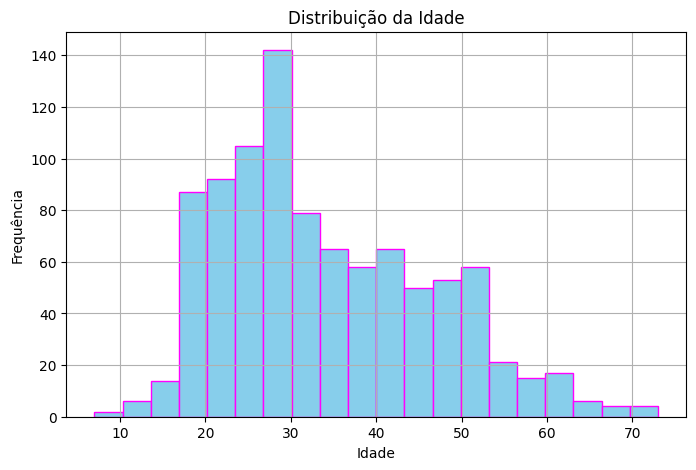

In [4]:
import matplotlib.pyplot as plt

# Plotar histograma da idade
plt.figure(figsize=(8, 5))
plt.hist(df_users['age'], bins=20, color='skyblue', edgecolor='magenta')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


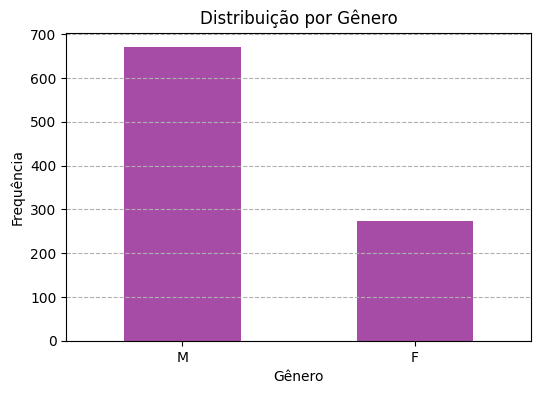

In [5]:
# Contagem de gêneros
gender_counts = df_users['gender'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()


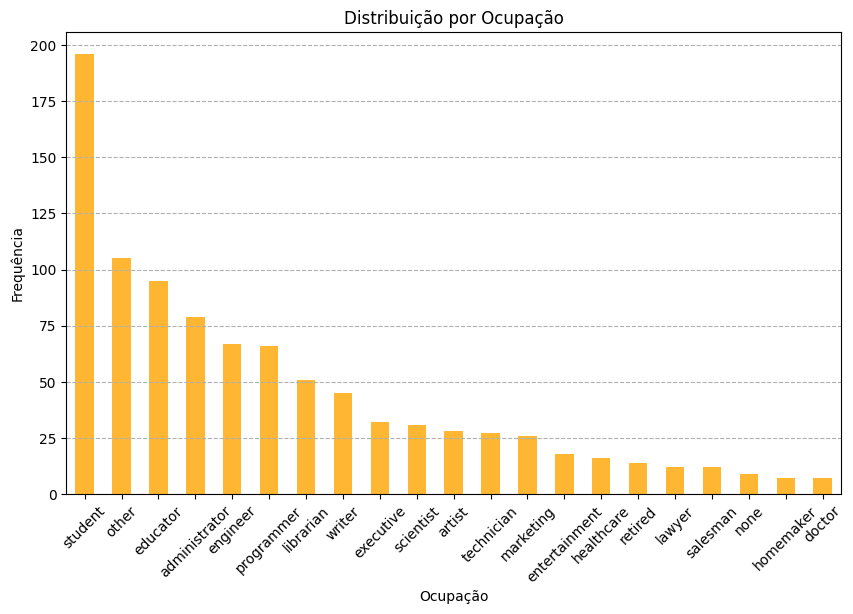

In [6]:
# Contagem de ocupações
occupation_counts = df_users['occupation'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Distribuição por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


In [7]:
# Reformular o dataset, removendo as colunas irrelevantes
df_users = df_users.drop(columns=["user_id", "zip_code"])
print("Colunas reformuladas:")
print(df_users.head())


Colunas reformuladas:
   age gender  occupation
0   24      M  technician
1   53      F       other
2   23      M      writer
3   24      M  technician
4   33      F       other


In [8]:
# Verificar valores ausentes
print("Verificando valores ausentes no dataset:")
print(df_users.isnull().sum())


Verificando valores ausentes no dataset:
age           0
gender        0
occupation    0
dtype: int64


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar a coluna 'age'
scaler = MinMaxScaler()
df_users['age'] = scaler.fit_transform(df_users[['age']])
print("Dados após a normalização:")
print(df_users.head())


Dados após a normalização:
        age gender  occupation
0  0.257576      M  technician
1  0.696970      F       other
2  0.242424      M      writer
3  0.257576      M  technician
4  0.393939      F       other


In [10]:
# Codificar variáveis categóricas
df_users = pd.get_dummies(df_users, columns=["gender", "occupation"], drop_first=True)
print("Dados após a codificação:")
print(df_users.head())


Dados após a codificação:
        age  gender_M  occupation_artist  occupation_doctor  \
0  0.257576      True              False              False   
1  0.696970     False              False              False   
2  0.242424      True              False              False   
3  0.257576      True              False              False   
4  0.393939     False              False              False   

   occupation_educator  occupation_engineer  occupation_entertainment  \
0                False                False                     False   
1                False                False                     False   
2                False                False                     False   
3                False                False                     False   
4                False                False                     False   

   occupation_executive  occupation_healthcare  occupation_homemaker  ...  \
0                 False                  False                 False  ...   
1 

CLUSTERIZAÇÃO (k-médias)

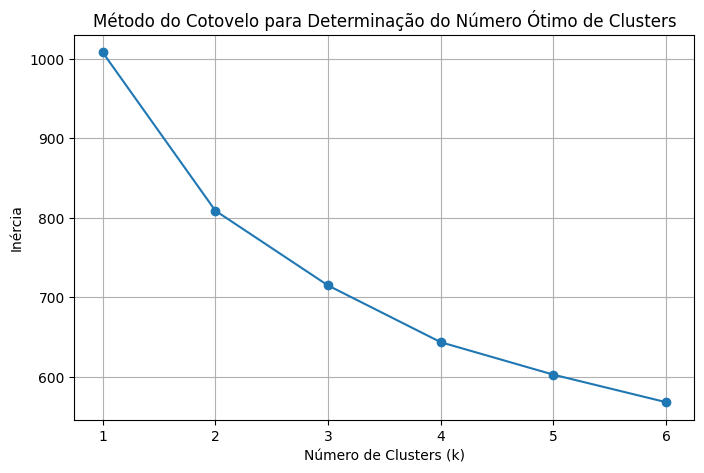

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir o intervalo de valores de k a ser testado 
k_values = range(1, 7)  # Testando até 6 clusters
inertias = []

# Ajustar o modelo K-Means para diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_users)  # dataframe já processado
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo para Determinação do Número Ótimo de Clusters")
plt.grid(True)
plt.show()


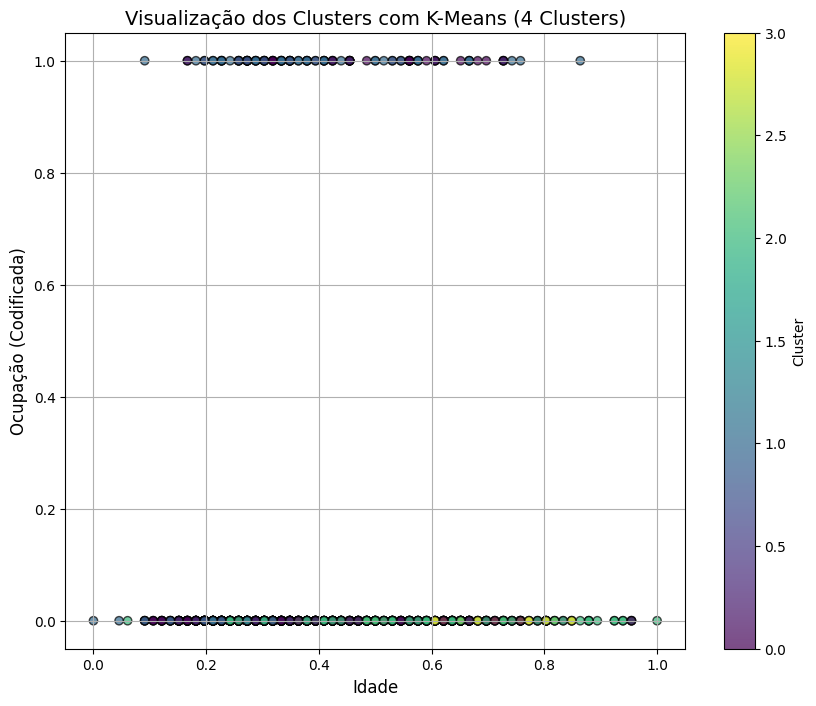

In [12]:
# Aplicar o modelo K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_users['Cluster'] = kmeans.fit_predict(df_users)

# Visualizar os clusters com base em duas variáveis
plt.figure(figsize=(10, 8))
plt.scatter(df_users['age'], df_users['occupation_other'], c=df_users['Cluster'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.title("Visualização dos Clusters com K-Means (4 Clusters)", fontsize=14)
plt.xlabel("Idade", fontsize=12)
plt.ylabel("Ocupação (Codificada)", fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Índice Médio de Silhueta para 4 clusters: 0.4128


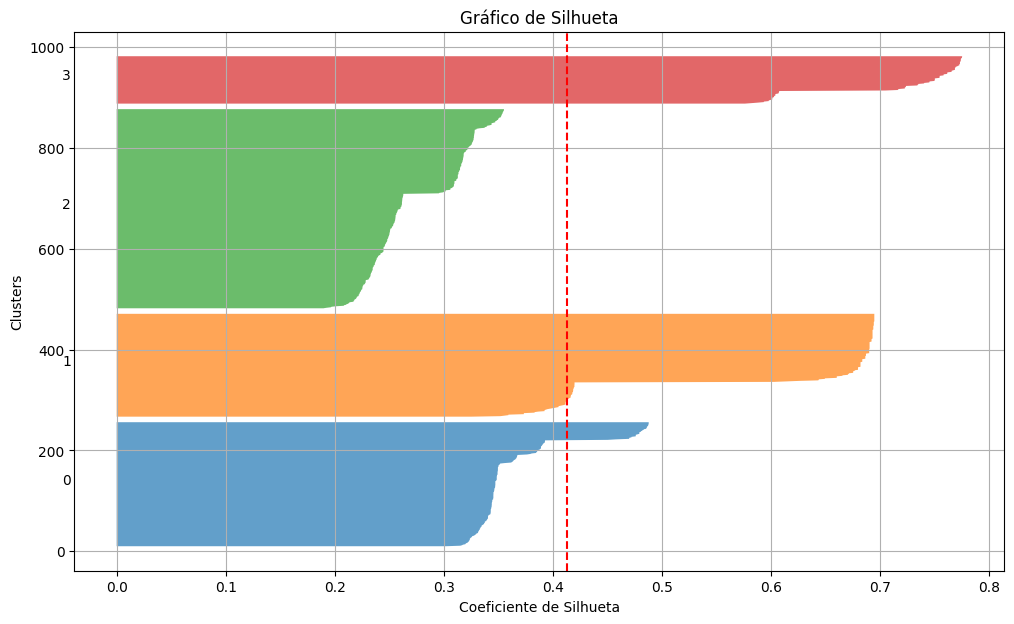

In [13]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Calcular o índice de silhueta para cada ponto
silhouette_vals = silhouette_samples(df_users, df_users['Cluster'])
silhouette_avg = silhouette_score(df_users, df_users['Cluster'])

print(f"Índice Médio de Silhueta para 4 clusters: {silhouette_avg:.4f}")

# Plotar o gráfico de silhueta
plt.figure(figsize=(12, 7))
y_lower = 10  # Espaçamento inicial no gráfico

for i in range(4):  # Número de clusters = 4
    cluster_vals = silhouette_vals[df_users['Cluster'] == i]
    cluster_vals.sort()
    y_upper = y_lower + len(cluster_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_vals), str(i))
    y_lower = y_upper + 10  # Espaçamento entre clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Gráfico de Silhueta")
plt.xlabel("Coeficiente de Silhueta")
plt.ylabel("Clusters")
plt.grid(True)
plt.show()


In [14]:
# Obter os centróides dos clusters
centroids = kmeans.cluster_centers_

# Criar um DataFrame para facilitar a interpretação dos centróides
# Use df_users.columns[:len(centroids[0])] para garantir correspondência de colunas
centroids_df = pd.DataFrame(centroids, columns=df_users.columns[:len(centroids[0])])
print("Centróides dos Clusters:")
print(centroids_df)

# Analisar cada cluster
for i, row in centroids_df.iterrows():
    print(f"\nCluster {i}:")
    print(row)


Centróides dos Clusters:
        age      gender_M  occupation_artist  occupation_doctor  \
0  0.397804  2.220446e-16       5.263158e-02      -8.673617e-18   
1  0.295344  1.000000e+00      -2.428613e-17      -6.071532e-18   
2  0.447773  1.000000e+00       3.787879e-02       1.767677e-02   
3  0.530463  7.263158e-01       6.938894e-18       1.734723e-18   

   occupation_educator  occupation_engineer  occupation_entertainment  \
0         1.110223e-16         8.097166e-03              8.097166e-03   
1         9.714451e-17         4.163336e-17              2.428613e-17   
2         1.249001e-16         1.641414e-01              4.040404e-02   
3         1.000000e+00         4.163336e-17              3.469447e-18   

   occupation_executive  occupation_healthcare  occupation_homemaker  ...  \
0          1.214575e-02           4.453441e-02          2.429150e-02  ...   
1         -4.163336e-17          -2.081668e-17         -6.071532e-18  ...   
2          7.323232e-02           1.262626

DBSCAN

eps=0.05, min_samples=3 -> Clusters: 51, Ruídos: 93, Silhueta: 0.6241
eps=0.05, min_samples=5 -> Clusters: 32, Ruídos: 187, Silhueta: 0.5330
eps=0.05, min_samples=7 -> Clusters: 27, Ruídos: 287, Silhueta: 0.3549
eps=0.1, min_samples=3 -> Clusters: 37, Ruídos: 46, Silhueta: 0.8179
eps=0.1, min_samples=5 -> Clusters: 27, Ruídos: 93, Silhueta: 0.7346
eps=0.1, min_samples=7 -> Clusters: 24, Ruídos: 123, Silhueta: 0.6885
eps=0.2, min_samples=3 -> Clusters: 35, Ruídos: 12, Silhueta: 0.8969
eps=0.2, min_samples=5 -> Clusters: 30, Ruídos: 31, Silhueta: 0.8614
eps=0.2, min_samples=7 -> Clusters: 25, Ruídos: 66, Silhueta: 0.7945
eps=0.3, min_samples=3 -> Clusters: 35, Ruídos: 11, Silhueta: 0.9020
eps=0.3, min_samples=5 -> Clusters: 31, Ruídos: 23, Silhueta: 0.9012
eps=0.3, min_samples=7 -> Clusters: 27, Ruídos: 46, Silhueta: 0.8314

Resultados:
     eps  min_samples  n_clusters  n_noise  silhouette_score
0   0.05            3          51       93          0.624146
1   0.05            5          

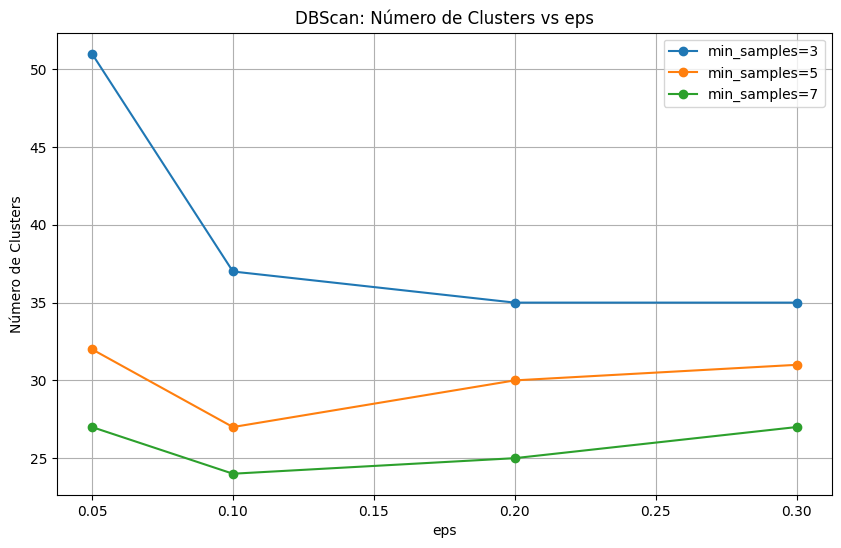

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Parâmetros a serem testados
eps_values = [0.05, 0.1, 0.2, 0.3]  # Valores de eps
min_samples_values = [3, 5, 7]      # Valores de min_samples

# DataFrame para armazenar os resultados
results = []

# Testar diferentes combinações de eps e min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_users)
        
        # Contar o número de clusters formados (excluindo ruído)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)  # Contar ruídos
        
        # Calcular índice de Silhueta apenas se houver mais de 1 cluster
        if n_clusters > 1:
            sil_score = silhouette_score(df_users, labels)
        else:
            sil_score = -1  # Silhueta não é válida se houver apenas 1 cluster
        
        # Armazenar os resultados
        results.append((eps, min_samples, n_clusters, n_noise, sil_score))
        print(f"eps={eps}, min_samples={min_samples} -> Clusters: {n_clusters}, Ruídos: {n_noise}, Silhueta: {sil_score:.4f}")

# Criar DataFrame com os resultados
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'n_clusters', 'n_noise', 'silhouette_score'])
print("\nResultados:")
print(results_df)

# Plotar os resultados
plt.figure(figsize=(10, 6))
for min_samples in min_samples_values:
    subset = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['n_clusters'], label=f"min_samples={min_samples}", marker='o')

plt.xlabel("eps")
plt.ylabel("Número de Clusters")
plt.title("DBScan: Número de Clusters vs eps")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Davies-Bouldin e Calinski-Harabasz para K-Means
dbi_kmeans = davies_bouldin_score(df_users, df_users['Cluster'])
ch_kmeans = calinski_harabasz_score(df_users, df_users['Cluster'])

print(f"Índice Davies-Bouldin (K-Means): {dbi_kmeans:.4f}")
print(f"Índice Calinski-Harabasz (K-Means): {ch_kmeans:.4f}")

# Davies-Bouldin e Calinski-Harabasz para DBScan
# Filtra os ruídos do DBScan (-1)
dbscan_clusters = df_users[df_users['Cluster_DBScan'] != -1]

dbi_dbscan = davies_bouldin_score(dbscan_clusters, dbscan_clusters['Cluster_DBScan'])
ch_dbscan = calinski_harabasz_score(dbscan_clusters, dbscan_clusters['Cluster_DBScan'])

print(f"Índice Davies-Bouldin (DBScan): {dbi_dbscan:.4f}")
print(f"Índice Calinski-Harabasz (DBScan): {ch_dbscan:.4f}")


Índice Davies-Bouldin (K-Means): 6.5722
Índice Calinski-Harabasz (K-Means): 33.9887
Índice Davies-Bouldin (DBScan): 0.1325
Índice Calinski-Harabasz (DBScan): 92271.6260
